# How to plot derivatives

In this guide we show you how to plot numerical derivatives calculated using estimagic's `first_derivative` function.

## Why plot your derivatives?

In estimagic derivatives are mainly used to help in optimization. When an optimization process is stuck it can be helpful in the debugging procedure to examine the derivative more closely.

## Univariate functions

The function ``derivative_plot`` works on the dictionary returned by ``first_derivative``. Note that this **requires** ``return_func_value`` and ``return_info`` to be set to True, **and** ``n_steps`` to be larger than 1.

In [1]:
import numpy as np

from estimagic import first_derivative


def sphere(params):
    return params @ params


fd = first_derivative(
    func=sphere, params=np.zeros(1), n_steps=4, return_func_value=True, return_info=True
)

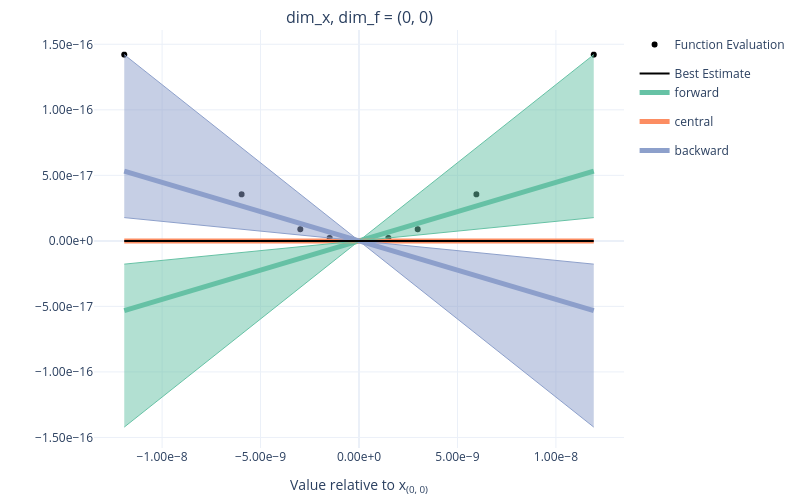

In [2]:
from estimagic.visualization.derivative_plot import derivative_plot

fig = derivative_plot(fd)

fig = fig.update_layout(width=800, height=500)
fig.show(renderer="png")

### Description:

The figure visualizes the function evaluations, the best estimate of the derivative and forward, central and backward derivative estimates. Forward and backward estimates come with bands that are calculated by applying the standard (forward/backward) formula on the smallest and largest possible steps. **These bands are not confidence intervals**, they shall merely give a rough overview where the true derivative may lie.

## Multivariate functions

In [3]:
def multivariate(params):
    y1 = params[0] ** 3 + params[1]
    y2 = params[2] ** 2 - params[0]
    return np.array([y1, y2])


fd = first_derivative(
    func=multivariate,
    params=np.zeros(3),
    n_steps=4,
    return_func_value=True,
    return_info=True,
)

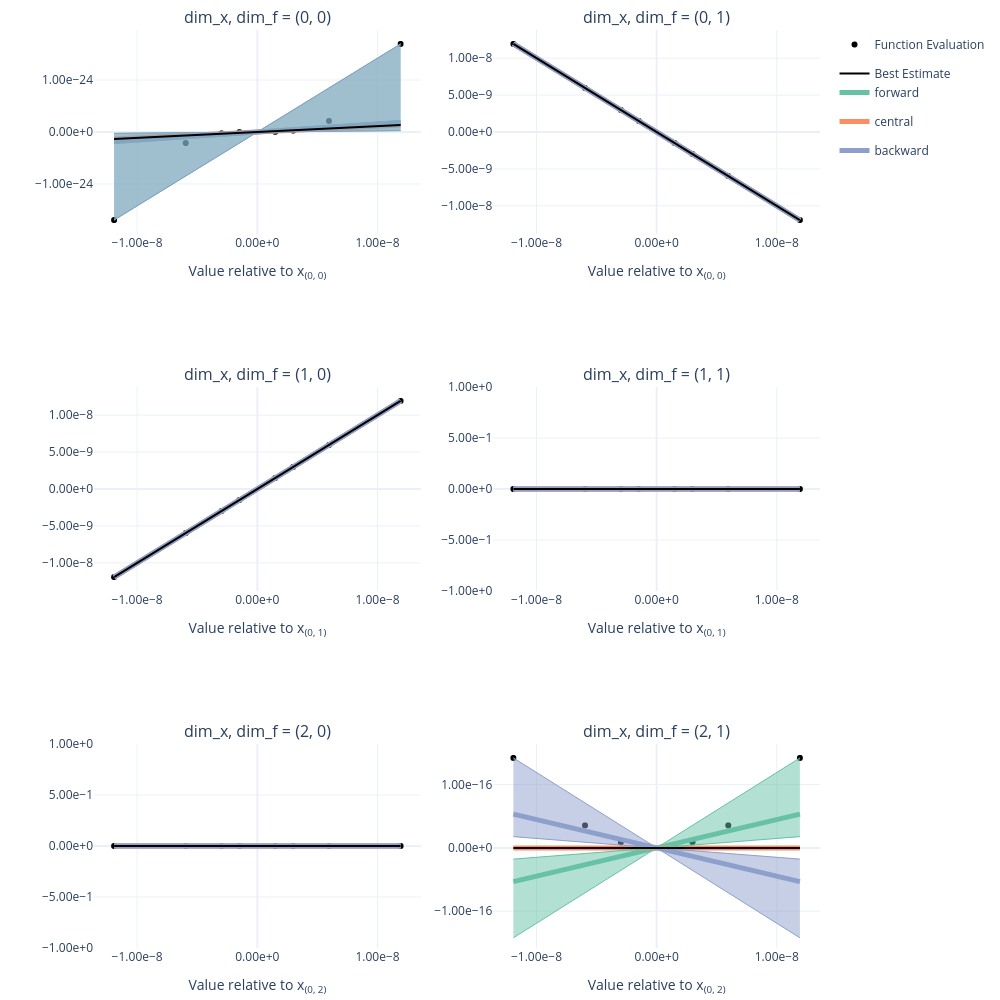

In [4]:
fig = derivative_plot(fd)

fig = fig.update_layout(height=1000, width=1000)
fig.show(renderer="png")